In [32]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import matplotlib as plt
from matplotlib import pyplot

import statsmodels.api as sm

In [12]:
# Import csv file as a dataframe
df = pd.read_csv("ToyotaCorolla.csv")

In [13]:
# Preview the data
df.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [136]:
# Exploring the data set by checking data types
df.dtypes

Id                   int64
Model               object
Price                int64
Age                  int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
d

In [14]:
# count observations of each column to check for missing values
df.count()

Id                  1436
Model               1436
Price               1436
Age                 1436
Mfg_Month           1436
Mfg_Year            1436
KM                  1436
Fuel_Type           1436
HP                  1436
Met_Color           1436
Automatic           1436
cc                  1436
Doors               1436
Cylinders           1436
Gears               1436
Quarterly_Tax       1436
Weight              1436
Mfr_Guarantee       1436
BOVAG_Guarantee     1436
Guarantee_Period    1436
ABS                 1436
Airbag_1            1436
Airbag_2            1436
Airco               1436
Automatic_airco     1436
Boardcomputer       1436
CD_Player           1436
Central_Lock        1436
Powered_Windows     1436
Power_Steering      1436
Radio               1436
Mistlamps           1436
Sport_Model         1436
Backseat_Divider    1436
Metallic_Rim        1436
Radio_cassette      1436
Tow_Bar             1436
dtype: int64

In [138]:
# check for missing values 
# False stands for not missing value 
missing_data = df.isnull()
missing_data.head()

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [144]:
# count the number of missing values from all columns and rows
df.isnull().sum().sum()

0

In [42]:
# Delete Id column since it is an assigned number to each observation and doesn't influence Price
# Delete Model column because it overlaps with some of the other variables (i.e. the model depends on other specifications or variables such as number of doors, etc.)
df2 = df.drop(['Id', 'Model'], axis=1)

In [43]:
# Retrieve descriptive statistics 
df2.describe()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <a list of 10 Patch objects>)

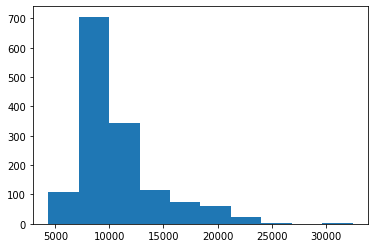

In [21]:
# Create Histogram to visualize the data and determine if Y variable Price is normally distributed
plt.pyplot.hist(df1["Price"], bins = 10)

In [22]:
# observations are slightly skewed to the left
# proceed with regression for the purposes of this project assuming normal distribution

In [44]:
# create n-1 dummy variables for categorical variable Fuel_Type
pd.get_dummies(df2.Fuel_Type, prefix='Fuel_Type').iloc[:, 1:]

,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1431,0,1
1432,0,1
1433,0,1
1434,0,1


In [45]:
dummy_variable_1 = pd.get_dummies(df2.Fuel_Type, prefix='Fuel_Type').iloc[:, 1:]

In [48]:
# concatenate columns
df1 = pd.concat([df2, dummy_variable_1], axis=1)

# create dummy variables for multiple categories
# drop_first=True handles k - 1 
df2 = pd.get_dummies(df2, columns=['Fuel_Type'], drop_first=True)

# this drops original Fuel_Type column
# and creates dummy variables

In [49]:
df2.head()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0


In [50]:
# correlation matrix to check for multicolinearity
df2.corr()

,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,NaN,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369,0.054084,-0.038516
Age,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720,-0.097740,0.092611
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,NaN,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170,0.051501,-0.049646
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,0.151442,NaN,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206,0.088986,-0.084162
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153,0.403060,-0.433160
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271,-0.533453,0.489110
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,NaN,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536,-0.012420,0.004872
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,NaN,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786,-0.084490,0.080249
cc,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,NaN,0.014629,0.306996,0.335637,-0.057407,-0.081725,-0.017683,0.037806,0.022678,0.024738,0.119888,0.162669,0.009312,0.057787,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,NaN,-0.160141,0.109363,0.302618,0.037689,-0.014311,0.053654,0.063733,0.053828,0.021734,0.170544,0.054809,0.089606,0.094653,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292,0.025495,-0.027589


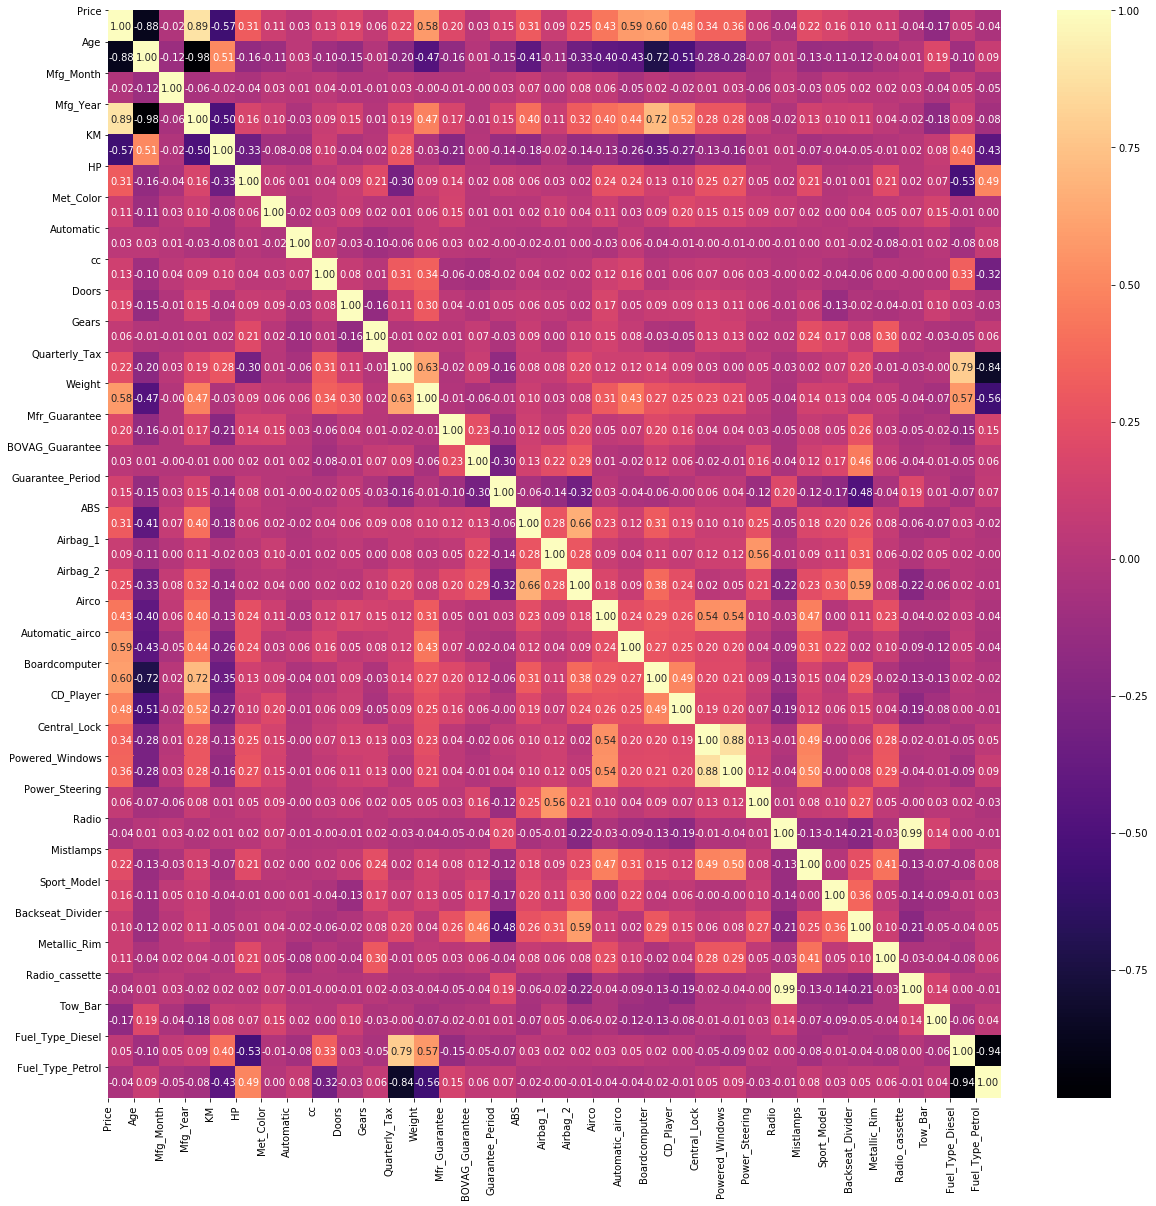

In [64]:
# For a heatmap version
corr = df2.corr()
# Plot figsize
fig, ax = plt.pyplot.subplots(figsize=(20, 20))
# Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
# Add xticks and yticks
plt.pyplot.xticks(range(len(corr.columns)), corr.columns);
plt.pyplot.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.pyplot.show()

In [52]:
# Remove Cylinders since all observations have the same number of cylinders but different prices, means number of cylinders does not have an effect on car price
# Cylinders has no correlation with price
df2.drop("Cylinders", axis=1, inplace = True)

In [55]:
# Remove variables with a low correlation (<0.01) with Price 
# Remove variables that are strongly correlated with other variables (>0.4 or <-0.4)
# Remove variables that do not make logical sense to be predictor of Price (e.g Mfg_Month)
df3 = df2.drop(['Mfg_Month','Age', 'KM', 'Gears', 'Quarterly_Tax', 'Weight', 'BOVAG_Guarantee', 'Backseat_Divider', 'ABS', 'Power_Steering','Central_Lock', 'Powered_Windows', 'Mistlamps', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Radio', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'], axis = 1)

In [56]:
df3.head()

,Price,Mfg_Year,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,Airbag_1,Airbag_2,Airco,Sport_Model,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,2002,90,1,0,2000,3,0,3,1,1,0,0,0,0,0
1,13750,2002,90,1,0,2000,3,0,3,1,1,1,0,0,0,0
2,13950,2002,90,1,0,2000,3,1,3,1,1,0,0,0,0,0
3,14950,2002,90,0,0,2000,3,1,3,1,1,0,0,0,0,0
4,13750,2002,90,0,0,2000,3,1,3,1,1,1,0,0,0,0


In [58]:
# define x and y variables
x = df3[['Mfg_Year','HP','Met_Color','Automatic', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Airbag_2', 'Airco', 'Sport_Model', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']]
y = df3['Price']

In [87]:
# Split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

# This splits the data randomly into 80% training and 20% testing 

In [88]:
# Create Linear Regression model
# Using statsmodels OLS rather than sklearn LinearRegression to obtain p-values of coefs
# Add a constant so we have an intercept
x_train = sm.add_constant(x_train)
regression1 = sm.OLS(y_train, x_train) 
results1 = regression1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     400.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:16:31   Log-Likelihood:                -9988.5
No. Observations:                1148   AIC:                         2.001e+04
Df Residuals:                    1132   BIC:                         2.009e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.922e+06   6.83e+04  

In [110]:
print('Parameters: ', results1.params)
print('R2: ', results1.rsquared)

Parameters:  const              -3.921954e+06
Mfg_Year            1.963638e+03
HP                  3.271898e+01
Met_Color           6.340285e+01
Automatic           9.899126e+02
cc                  1.183248e+00
Doors               1.837586e+02
Mfr_Guarantee       3.185267e+02
Guarantee_Period    1.758878e+01
Airbag_1            1.185083e+01
Airbag_2           -6.767013e+02
Airco               4.246324e+02
Sport_Model         8.014524e+02
Metallic_Rim        3.593290e+02
Radio_cassette     -2.580027e+02
Tow_Bar            -2.258850e+02
dtype: float64
R2:  0.8413923678588167


In [90]:
# Remove variables that are not significant one by one
# Remove Airbag_1
x_train2 = x_train[['Mfg_Year','HP','Met_Color','Automatic', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Airco', 'Sport_Model', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']]

In [111]:
# Regression 2
x_train2 = sm.add_constant(x_train2)
regression2 = sm.OLS(y_train, x_train2)
results2 = regression2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:52:12   Log-Likelihood:                -10005.
No. Observations:                1148   AIC:                         2.004e+04
Df Residuals:                    1133   BIC:                         2.012e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.808e+06   6.62e+04  

In [92]:
# Remove Radio_cassette
x_train3 = x_train2[['Mfg_Year','HP','Met_Color','Automatic', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Airco', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar']]

In [112]:
# Regression 3
x_train3 = sm.add_constant(x_train3)
regression3 = sm.OLS(y_train, x_train3)
results3 = regression3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     446.7
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:52:28   Log-Likelihood:                -10006.
No. Observations:                1148   AIC:                         2.004e+04
Df Residuals:                    1134   BIC:                         2.011e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.808e+06   6.63e+04  

In [94]:
# Remove Automatic
x_train4 = x_train3[['Mfg_Year','HP','Met_Color', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Airco', 'Sport_Model', 'Metallic_Rim', 'Tow_Bar']]

In [113]:
# Regression 4
x_train4 = sm.add_constant(x_train4)
regression4 = sm.OLS(y_train, x_train4)
results4 = regression4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     472.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:52:36   Log-Likelihood:                -10018.
No. Observations:                1148   AIC:                         2.006e+04
Df Residuals:                    1135   BIC:                         2.013e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.791e+06   6.69e+04  

In [96]:
# Remove Metallic_Rim
x_train5 = x_train4[['Mfg_Year','HP','Met_Color', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airbag_1', 'Airco', 'Sport_Model', 'Tow_Bar']]

In [114]:
# Regression 5
x_train5 = sm.add_constant(x_train5)
regression5 = sm.OLS(y_train, x_train5)
results5 = regression5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     511.9
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:52:54   Log-Likelihood:                -10021.
No. Observations:                1148   AIC:                         2.007e+04
Df Residuals:                    1136   BIC:                         2.013e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.776e+06   6.68e+04  

In [98]:
# Remove Airbag_1
x_train6 = x_train5[['Mfg_Year','HP','Met_Color', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Sport_Model', 'Tow_Bar']]

In [115]:
# Regression 6
x_train6 = sm.add_constant(x_train6)
regression6 = sm.OLS(y_train, x_train6)
results6 = regression6.fit() # this is the OLS object
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     562.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:53:35   Log-Likelihood:                -10022.
No. Observations:                1148   AIC:                         2.007e+04
Df Residuals:                    1137   BIC:                         2.012e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.77e+06   6.66e+04  

In [116]:
print('Parameters: ', results6.params)
print('R2: ', results6.rsquared)

Parameters:  const              -3.770365e+06
Mfg_Year            1.887576e+03
HP                  3.518337e+01
Met_Color           6.539346e+01
cc                  1.112032e+00
Doors               1.658174e+02
Mfr_Guarantee       2.601338e+02
Guarantee_Period    4.411794e+01
Airco               4.610728e+02
Sport_Model         6.984061e+02
Tow_Bar            -2.834714e+02
dtype: float64
R2:  0.8319285274411534


In [120]:
# Edit x_test set to reflect the removed variables
# Name it x_test2
x_test2 = x_test[['Mfg_Year','HP','Met_Color', 'cc', 'Doors', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Sport_Model', 'Tow_Bar']]

In [123]:
# Find the predicted y using the trained model

# Add again the constant
# Use the predict method of the OLS object
x_test2 = sm.add_constant(x_test2) 
y_test_predicted = results6.predict(x_test2) 
print(y_test_predicted)

651      9422.098303
411     11853.279827
342     14373.868720
1298     8451.006051
483     11942.687197
            ...     
1029    10013.866852
520     10168.811602
996     10297.338282
333     13279.783330
1069     7097.777705
Length: 288, dtype: float64


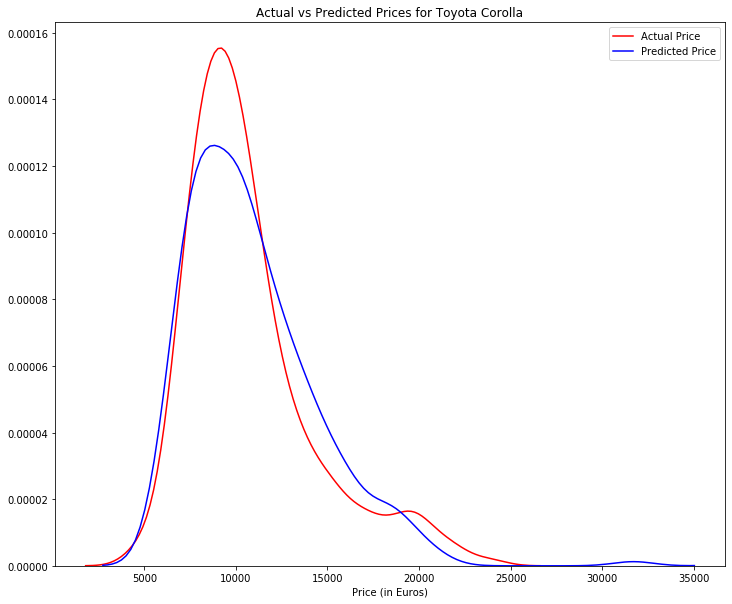

In [130]:
# Visualize and compare the predicted y versus the actual y from the test set

width=12
height=10
yhat=y_test_predicted
plt.pyplot.figure(figsize=(width, height))
ax1=sns.distplot(y_test, hist=False, color = "r", label="Actual Price")
sns.distplot(yhat, hist = False, color = "b", label="Predicted Price", ax=ax1)

plt.pyplot.title('Actual vs Predicted Prices for Toyota Corolla')
plt.pyplot.xlabel('Price (in Euros)')

plt.pyplot.show()
plt.pyplot.close()

In [135]:
#Now find the RMSE def rmse_accuracy_percentage(y_test,y_test_predicted):
print("RMSE is:",np.round(np.sqrt(sum(((np.array(y_test)-np.array(y_test_predicted))**2))/len(y_test)),2))

RMSE is: 1680.46
